Random Forest

In [1]:
import pandas as pd

DATASET_PATH = "dataset.json"

btc_price_history = pd.read_json(DATASET_PATH)

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

interval = "1h"

random_state = 42

hyperparameters = {
    "n_estimators": 300,
    "max_depth": 20,
    "min_samples_leaf": 1,
}

close_timestamps = pd.to_datetime(btc_price_history[interval]["ct"], unit='ms')
close_prices = btc_price_history[interval]["c"]

X = close_timestamps.values.astype(int).reshape(-1, 1)
y = close_prices

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

random_forest = RandomForestRegressor(
    n_estimators=hyperparameters.get('n_estimators'),
    max_depth=hyperparameters.get('max_depth'),
    min_samples_leaf=hyperparameters.get('min_samples_leaf'),
    random_state=random_state
)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")

Mean Squared Error: 248401452.21223235
Root Mean Squared Error (RMSE): 15760.756714454808
R-squared (R²): 0.031291177965858674


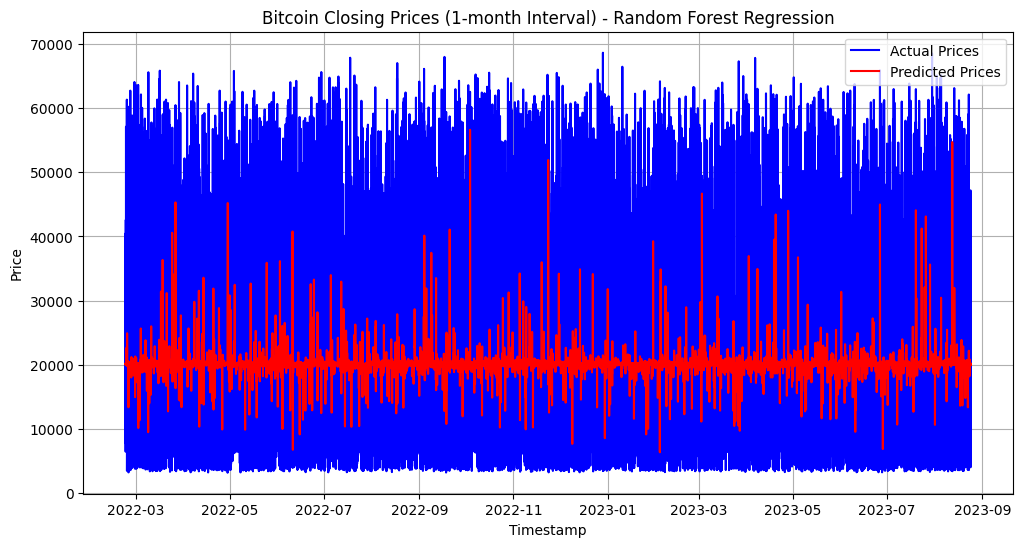

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(close_timestamps[-len(y_test):], y_test, color='blue', label='Actual Prices')
plt.plot(close_timestamps[-len(y_test):], y_pred, color='red', label='Predicted Prices')
plt.xlabel("Timestamp")
plt.ylabel("Price")
plt.title("Bitcoin Closing Prices (1-month Interval) - Random Forest Regression")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
import datetime

oct_10_2023 = datetime.datetime(2022, 10, 10)

epoch = oct_10_2023.timestamp() * 1000

In [5]:
random_forest.predict([[epoch]])

array([14200.21808412])

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

interval = "6h"
close_timestamps = pd.to_datetime(btc_price_history[interval]["ct"], unit='ms')
close_prices = btc_price_history[interval]["c"]
X = close_timestamps.values.astype(int).reshape(-1, 1)
y = close_prices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

random_forest = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(random_forest, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'n_estimators': 300}
Mean Squared Error: 248508353.83061618
Root Mean Squared Error (RMSE): 15764.14773562517
R-squared (R²): 0.006037215752668246
